In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
%matplotlib inline

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
#read the dataset
ds = pd.read_csv('winequality-red.csv')

In [12]:
# Exploring the dataset further by knowing its features and shape
print('Features:', ds.columns)
print('Shape of the dataset:', ds.shape)

Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Shape of the dataset: (1599, 12)


In [13]:
# getting the number of rows and columns
print("Rows, columns: " + str(ds.shape))
# getting the first five rows of the dataset
ds.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
#find missing values in dataset
print(ds.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Quality Check

In [17]:
round(100*(ds.isnull().sum()/len(ds)),2).sort_values(ascending=False)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [18]:
round(100*(ds.isnull().sum(axis=1)/len(ds)),2).sort_values(ascending=False)

0       0.0
1074    0.0
1072    0.0
1071    0.0
1070    0.0
       ... 
530     0.0
529     0.0
528     0.0
527     0.0
1598    0.0
Length: 1599, dtype: float64

# No missing / Null value in either row or columns

In [19]:
dub_ds=ds.copy()
dub_ds.drop_duplicates(subset=None,inplace=True)

In [20]:
dub_ds.shape

(1359, 12)

In [21]:
ds.shape

(1599, 12)

# The shape after running the drop duplicate command is not same as the original dataframe.Hence we can conclude that there were duplicate values in the dataset.

Assign non duplicate data to original data

In [22]:
ds = dub_ds

In [23]:
for col in ds:
    print(ds[col].value_counts(ascending=False), '\n\n\n')

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64 



0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64 



0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: citric acid, Length: 80, dtype: int64 



2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64 



0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64 



6.0     121
5.0      88
15.0     65
12.0     64
10.0     63
7.0      61
9.0      55
16.0  

### There seems to be no Junk/Unknown values in the entire dataset

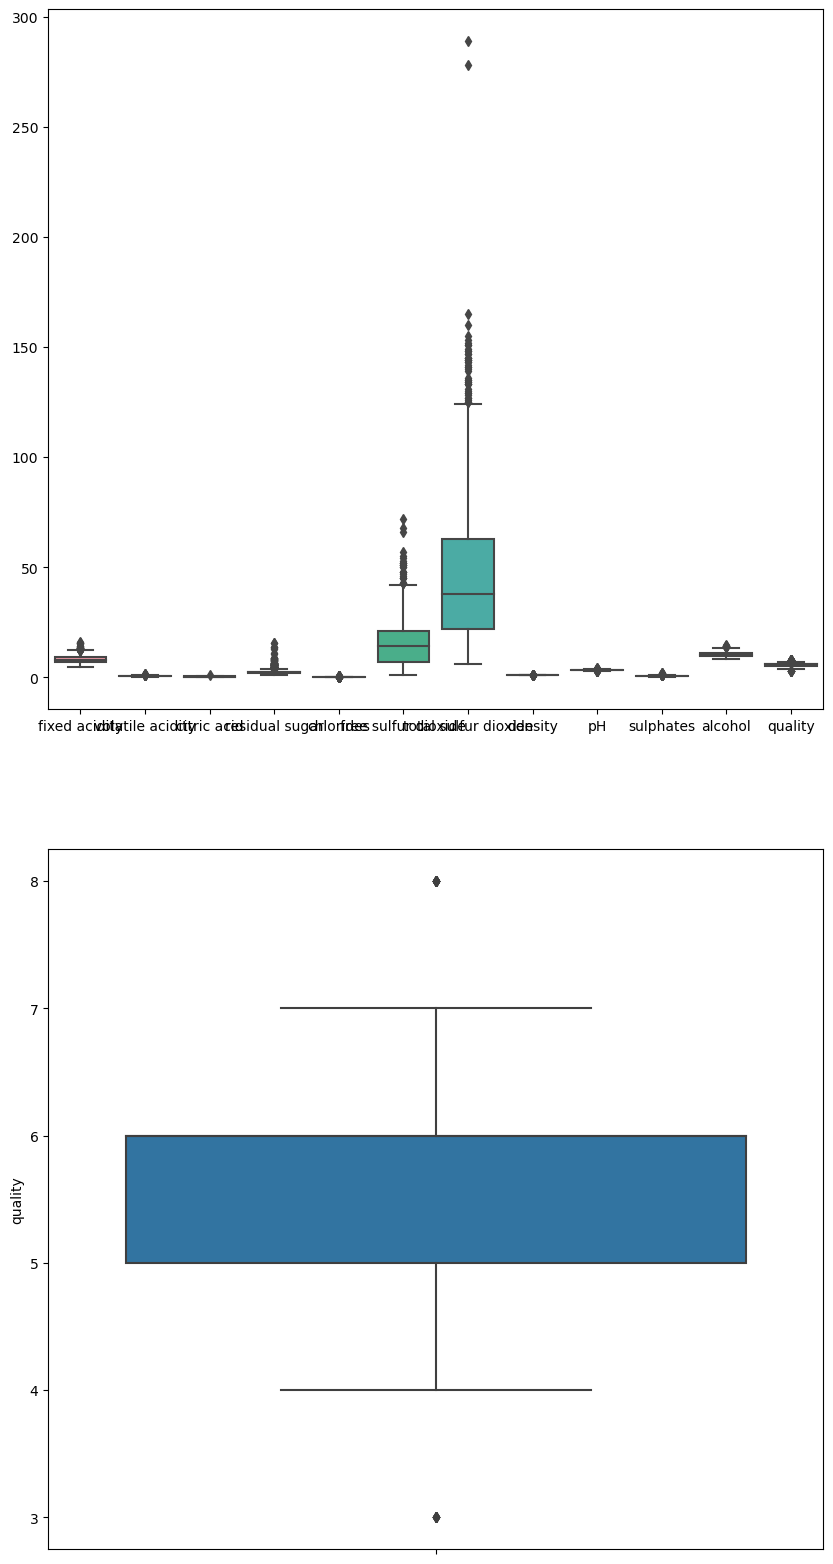

In [24]:
#Distribution of data
# Checking for outliers
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=ds,orient="v",ax=axes[0])
sns.boxplot(data=ds,y="quality",orient="pH",ax=axes[1])
plt.show()

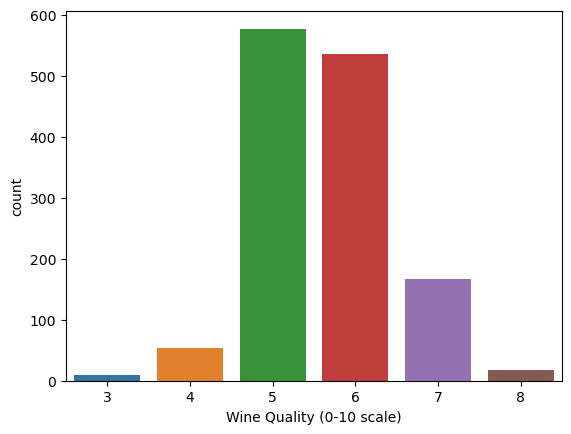

In [25]:
#distribution of class label
sns.countplot(x="quality", data=ds)
plt.xlabel("Wine Quality (0-10 scale)")
plt.show()

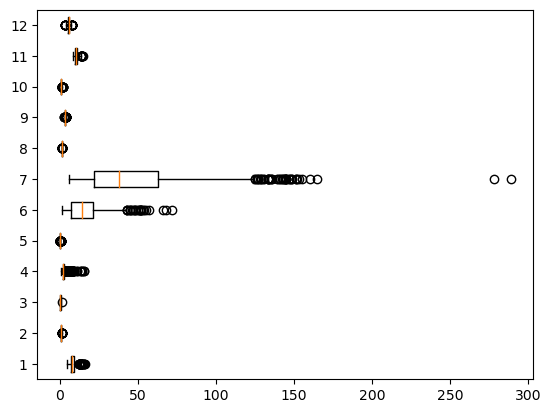

In [26]:
# Create the boxplot
fig, ax = plt.subplots()
box = ax.boxplot(ds.values, vert=False)

# Show the plot
plt.show()


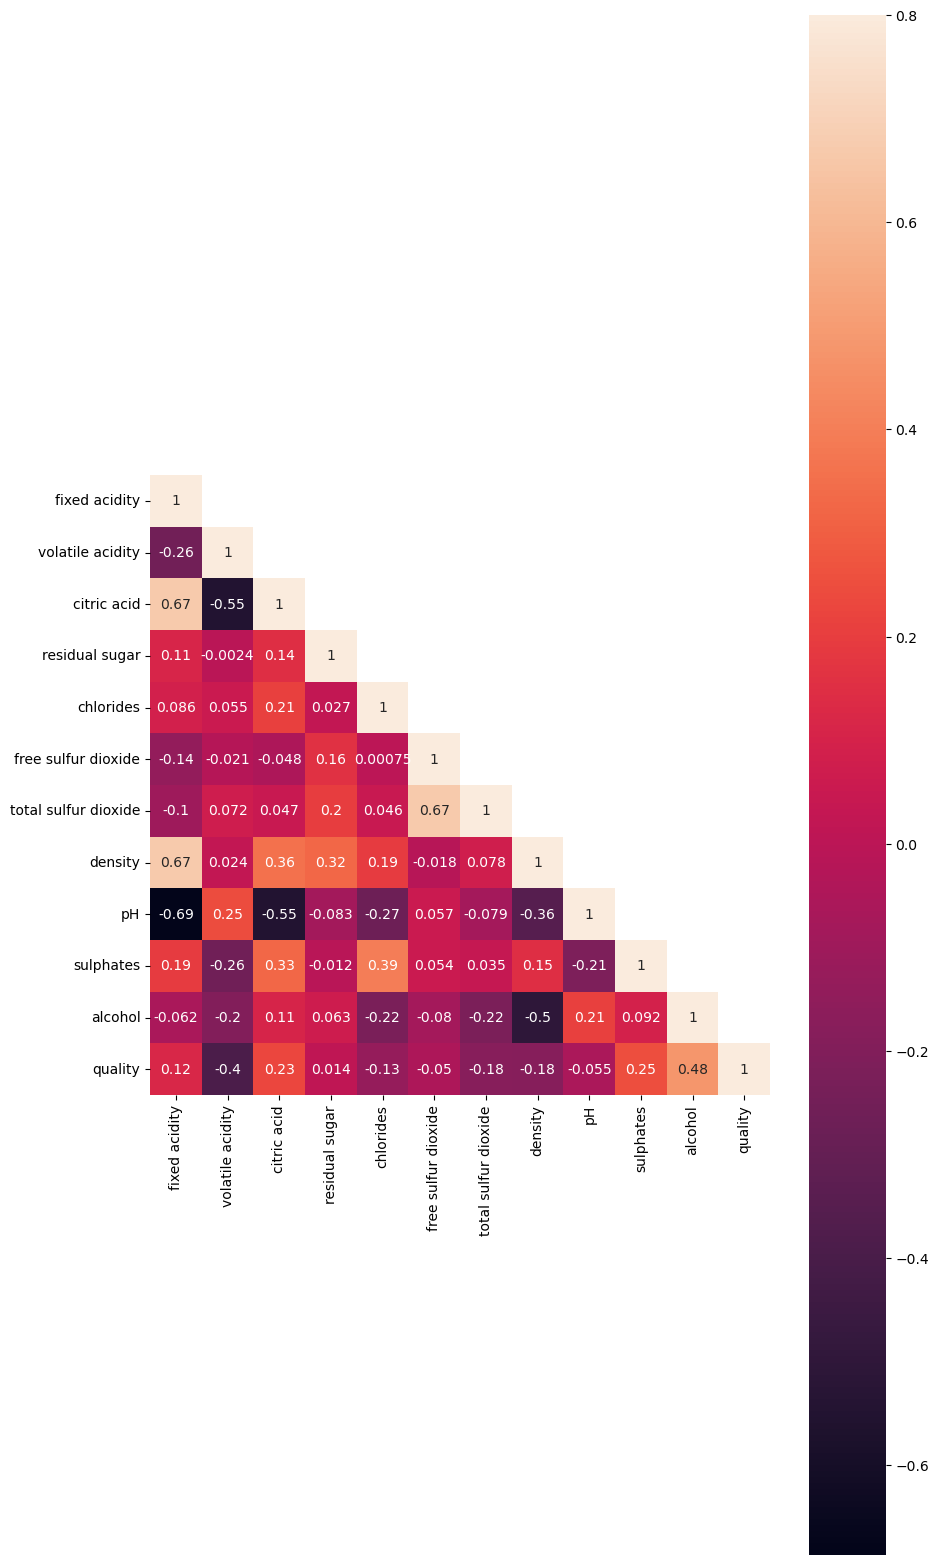

In [27]:
#Correlation analysis
corrMatt=ds.corr()
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

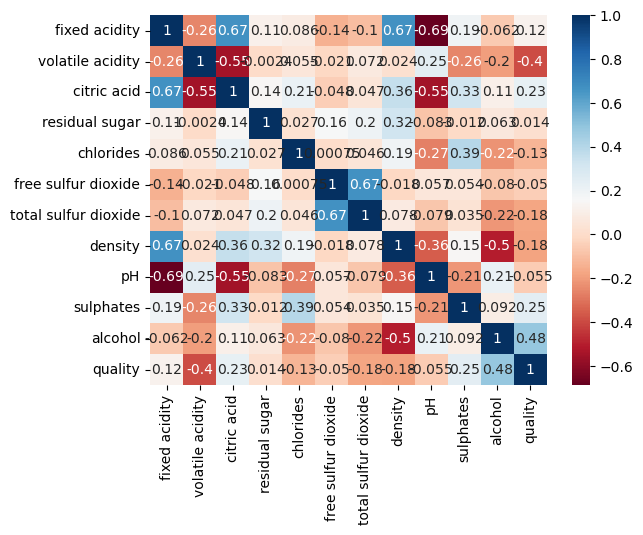

<Figure size 2000x2500 with 0 Axes>

In [28]:
sns.heatmap(corrMatt, annot=True, cmap='RdBu')
plt.figure(figsize=(20, 25))
plt.show()

In [29]:
from scipy import stats
z = np.abs(stats.zscore(ds))
print("Z-scores:", z)
threshold = 3
outliers = np.where(z > 3)
print("Outliers:", outliers)

ds_without_outliers = ds[(z < 3).all(axis=1)]
print("Data without outliers:", ds_without_outliers)

Z-scores:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.524431          0.932000     1.393258        0.461157   0.245623   
1          0.294063          1.915800     1.393258        0.056665   0.200094   
2          0.294063          1.259934     1.188617        0.165259   0.078535   
3          1.664067          1.363534     1.471711        0.461157   0.265883   
5          0.524431          0.713378     1.393258        0.535132   0.265883   
...             ...               ...          ...             ...        ...   
1593       0.869983          0.494756     0.983977        0.461157   0.407702   
1594       1.215536          0.385444     0.983977        0.387183   0.038015   
1595       1.388312          0.112167     0.881656        0.239233   0.529261   
1597       1.388312          0.631395     0.779336        0.387183   0.265883   
1598       1.330720          1.199567     1.011270        0.796410   0.427962   

      free sulfur

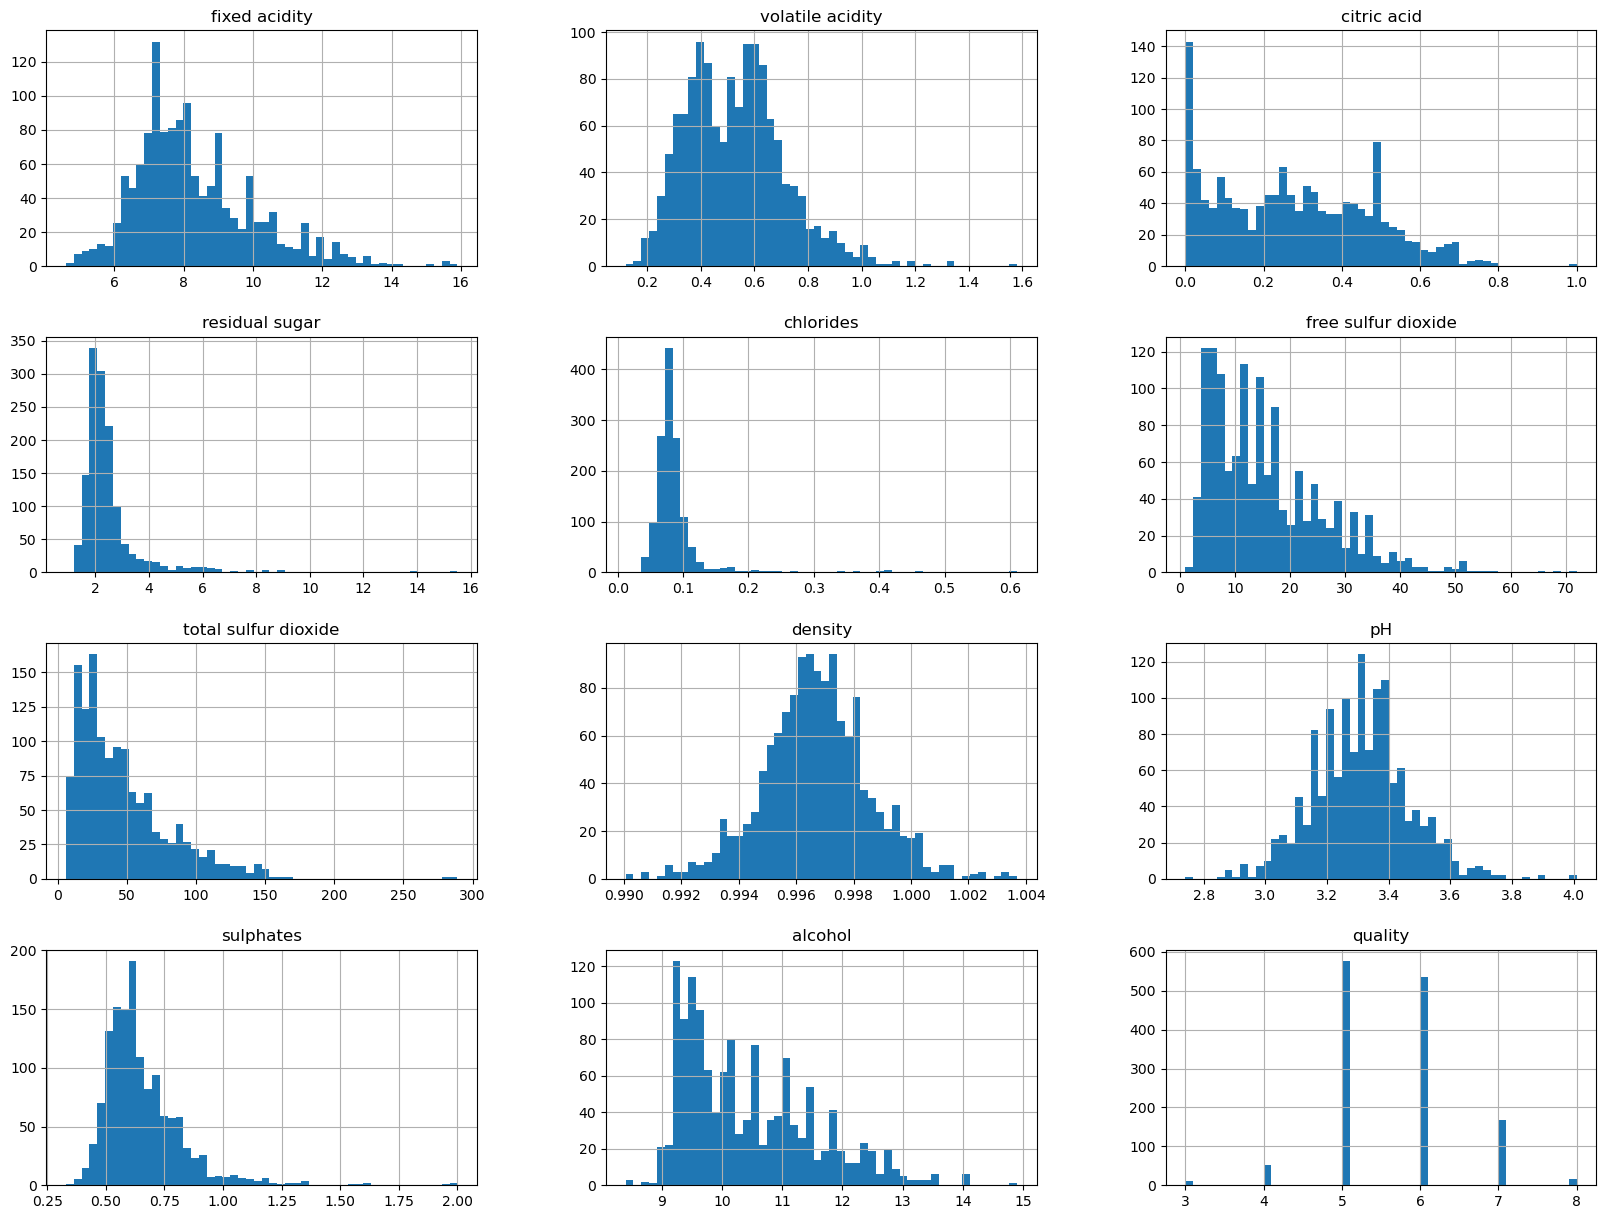

In [30]:
# Checking the distribution of data using histograms for all the features
ds.hist(bins=50, figsize=(20,15))
plt.show()


In [31]:
# split the data into features and target variables
X = ds.drop("quality", axis=1)
y = ds["quality"]

# adding extra column because of Multiple linear regression
# splitting the dataset
np.random.seed(0)
ds_train,ds_test=train_test_split(ds,train_size=0.7,test_size=0.3,random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the dataset
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

# Predict on the test set
y_pred_linear = regressor.predict(X_test)

# importing ridge and lasso regression model
from sklearn.linear_model import Ridge, Lasso
# fitting the ridge regression model
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

# making predictions using the ridge model
y_pred_ridge = ridge.predict(X_test)

#Prediction
prediction=regressor.predict(X_test)
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,5.245601
1,5.809935
2,6.368405
3,5.158733
4,5.199286


In [32]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 31 to 926
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         951 non-null    float64
 1   volatile acidity      951 non-null    float64
 2   citric acid           951 non-null    float64
 3   residual sugar        951 non-null    float64
 4   chlorides             951 non-null    float64
 5   free sulfur dioxide   951 non-null    float64
 6   total sulfur dioxide  951 non-null    float64
 7   density               951 non-null    float64
 8   pH                    951 non-null    float64
 9   sulphates             951 non-null    float64
 10  alcohol               951 non-null    float64
 11  quality               951 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 96.6 KB


In [33]:
ds_train.shape

(951, 12)

In [34]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 1573 to 677
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         408 non-null    float64
 1   volatile acidity      408 non-null    float64
 2   citric acid           408 non-null    float64
 3   residual sugar        408 non-null    float64
 4   chlorides             408 non-null    float64
 5   free sulfur dioxide   408 non-null    float64
 6   total sulfur dioxide  408 non-null    float64
 7   density               408 non-null    float64
 8   pH                    408 non-null    float64
 9   sulphates             408 non-null    float64
 10  alcohol               408 non-null    float64
 11  quality               408 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 41.4 KB


In [35]:
ds_test.shape

(408, 12)

### EDA

In [36]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 31 to 926
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         951 non-null    float64
 1   volatile acidity      951 non-null    float64
 2   citric acid           951 non-null    float64
 3   residual sugar        951 non-null    float64
 4   chlorides             951 non-null    float64
 5   free sulfur dioxide   951 non-null    float64
 6   total sulfur dioxide  951 non-null    float64
 7   density               951 non-null    float64
 8   pH                    951 non-null    float64
 9   sulphates             951 non-null    float64
 10  alcohol               951 non-null    float64
 11  quality               951 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 96.6 KB


In [37]:
ds_train.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

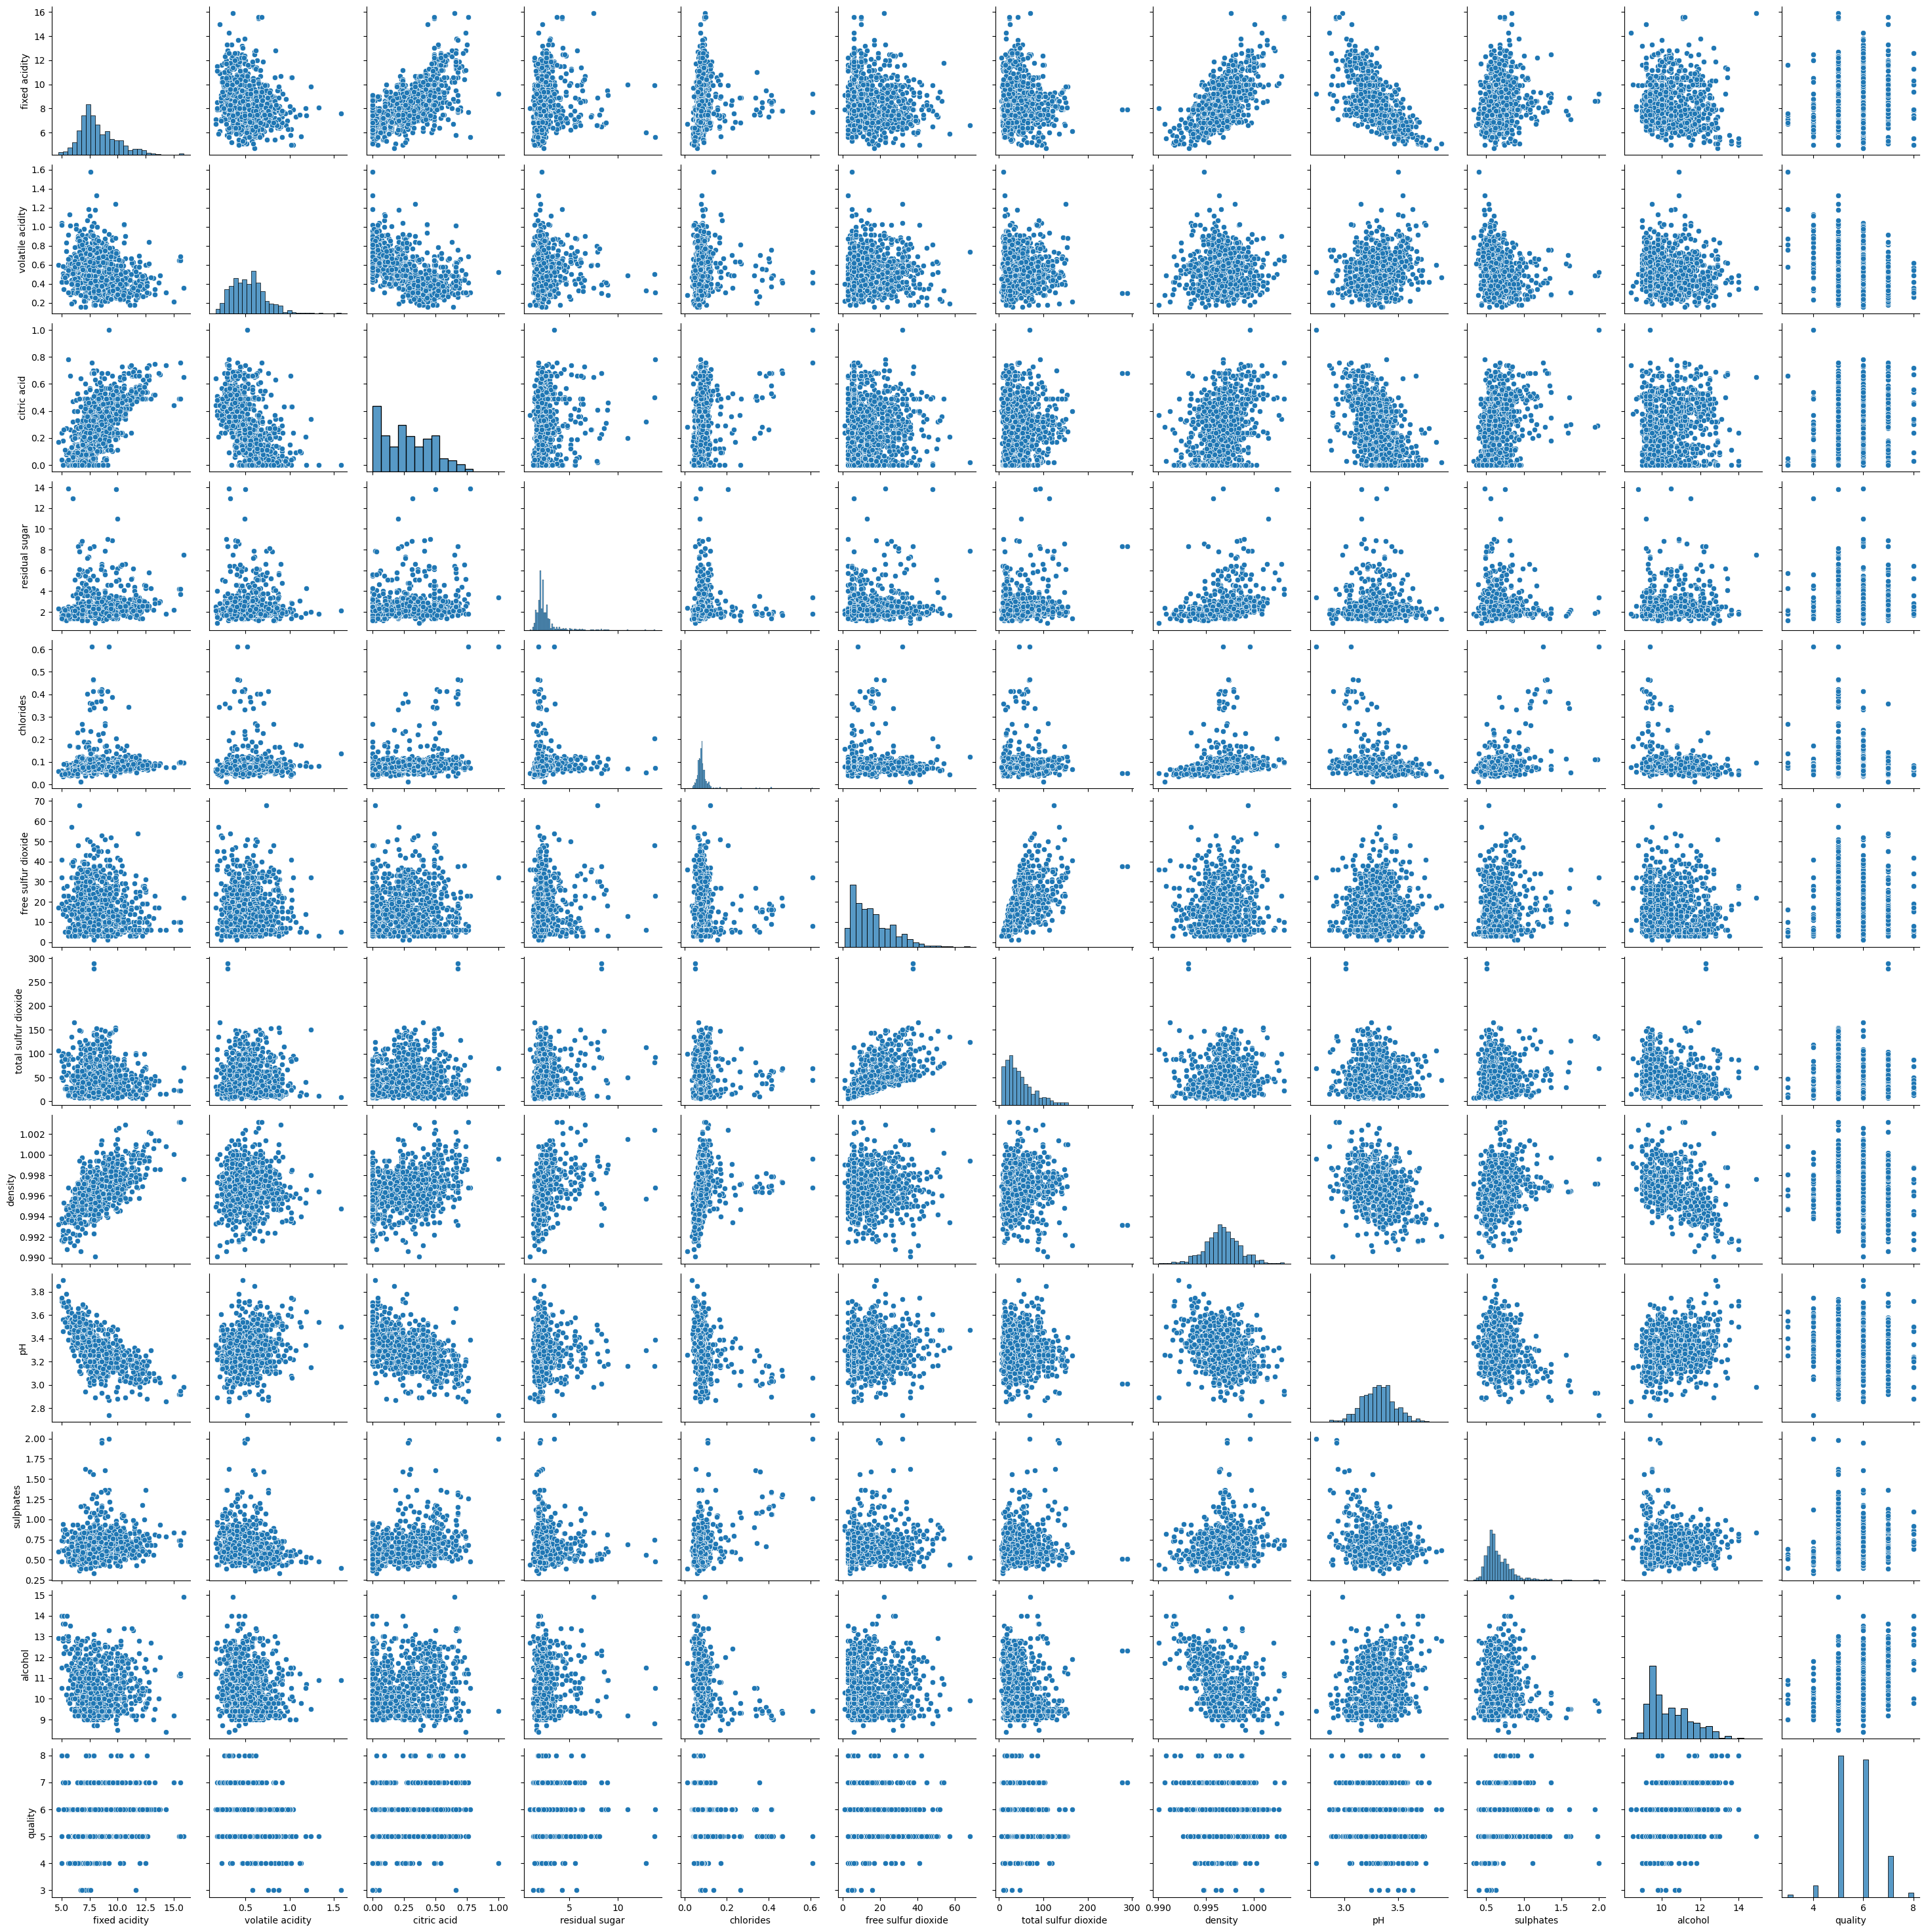

In [38]:
sns.pairplot(ds_train)
plt.show()

In [57]:
Scaler=MinMaxScaler()
ds_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
371,7.9,0.240,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6
952,8.2,0.310,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2,7
1037,7.3,0.910,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,5
1398,7.0,0.600,0.12,2.2,0.083,13.0,28.0,0.99660,3.52,0.62,10.2,7


In [58]:
ds_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [59]:
ds_train[:]=Scaler.fit_transform(ds_train[:])
ds_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,0.196429,0.369718,0.00,0.123077,0.155259,0.313433,0.109541,0.497334,0.620690,0.143713,0.338462,0.6
371,0.285714,0.056338,0.40,0.053846,0.073456,0.149254,0.067138,0.504950,0.500000,0.323353,0.046154,0.6
952,0.312500,0.105634,0.40,0.100000,0.076795,0.074627,0.014134,0.402894,0.491379,0.209581,0.430769,0.8
1037,0.232143,0.528169,0.10,0.069231,0.103506,0.283582,0.176678,0.506474,0.525862,0.137725,0.123077,0.4
1398,0.205357,0.309859,0.12,0.100000,0.118531,0.179104,0.077739,0.497334,0.672414,0.173653,0.276923,0.8


In [69]:
y_train=ds_train.pop('quality')
X_train=ds_train

In [91]:
rfe = RFE(regressor)
rfe = rfe.fit(X_train,y_train)

In [92]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fixed acidity', False, 7),
 ('volatile acidity', True, 1),
 ('citric acid', False, 6),
 ('residual sugar', False, 5),
 ('chlorides', True, 1),
 ('free sulfur dioxide', False, 3),
 ('total sulfur dioxide', True, 1),
 ('density', False, 4),
 ('pH', False, 2),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [93]:
col = X_train.columns[rfe.support_]
col

Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')

In [94]:
X_train.columns[~rfe.support_]

Index(['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide',
       'density', 'pH'],
      dtype='object')

In [95]:
X_train_rfe = X_train[col]

In [72]:
#Caluclating R-squared, RMSE and MAE of ridge regression
r2_r1 = r2_score(y_test, y_pred_ridge)
Rmse1 = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
Mae1 = mean_absolute_error(y_test, y_pred_ridge)

In [73]:
print("Ridge Model Metrics:")
print("R-squared:", r2_r1)
print("RMSE:", Rmse1)
print("MAE:", Mae1)

Ridge Model Metrics:
R-squared: 0.3916633340723469
RMSE: 0.656444089473551
MAE: 0.504115643843126


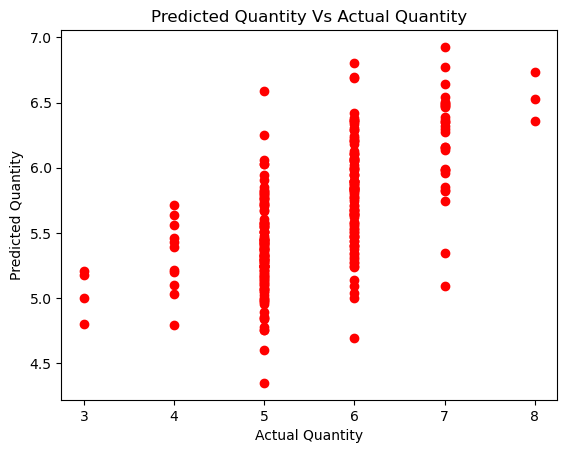

In [74]:
#displaying results
plt.scatter(y_test,prediction, c='r')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantity Vs Actual Quantity')
plt.show()


                 feature  coef_ridge
10               alcohol    0.333313
9              sulphates    0.148524
5    free sulfur dioxide    0.048597
7                density    0.041126
3         residual sugar   -0.004965
2            citric acid   -0.019053
0          fixed acidity   -0.048708
4              chlorides   -0.115838
8                     pH   -0.120923
6   total sulfur dioxide   -0.123452
1       volatile acidity   -0.178395


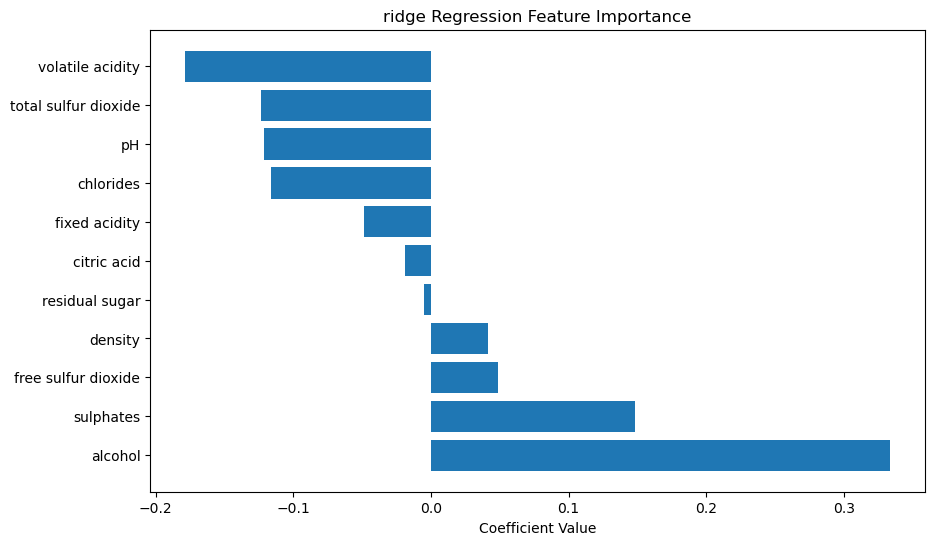

In [75]:
# Calculating the feature importance scores
coefs = pd.DataFrame({'feature': X.columns, 'coef_ridge': ridge.coef_})

# Sorting the features by their coefficient values
coefs.sort_values('coef_ridge', inplace=True, ascending=False)
print(coefs)
# Visualizing the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(coefs['feature'], coefs['coef_ridge'])
plt.title("ridge Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.show()

In [76]:
# fitting the lasso regression model
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

# making the predictions using the lasso model
y_pred_lasso = lasso.predict(X_test)

In [77]:
#Caluclating R-squared, RMSE and MAE of Lasso model
r2_r2 = r2_score(y_test, y_pred_lasso)
Rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
Mae2 = mean_absolute_error(y_test, y_pred_lasso)

In [78]:
print("Ridge Model Metrics:")
print("R-squared:", r2_r2)
print("RMSE:", Rmse2)
print("MAE:", Mae2)

Ridge Model Metrics:
R-squared: -35.88224292780266
RMSE: 5.111335729009865
MAE: 5.0415669264551255


In [79]:
# Calculating the feature importance scores
coefs = pd.DataFrame({'feature': X.columns, 'coef_lasso': lasso.coef_})

# Sorting the features by their coefficient values
coefs.sort_values('coef_lasso', inplace=True, ascending=False)
print(coefs)

                 feature  coef_lasso
0          fixed acidity         0.0
1       volatile acidity        -0.0
2            citric acid         0.0
3         residual sugar         0.0
4              chlorides        -0.0
5    free sulfur dioxide        -0.0
6   total sulfur dioxide        -0.0
7                density        -0.0
8                     pH        -0.0
9              sulphates         0.0
10               alcohol         0.0


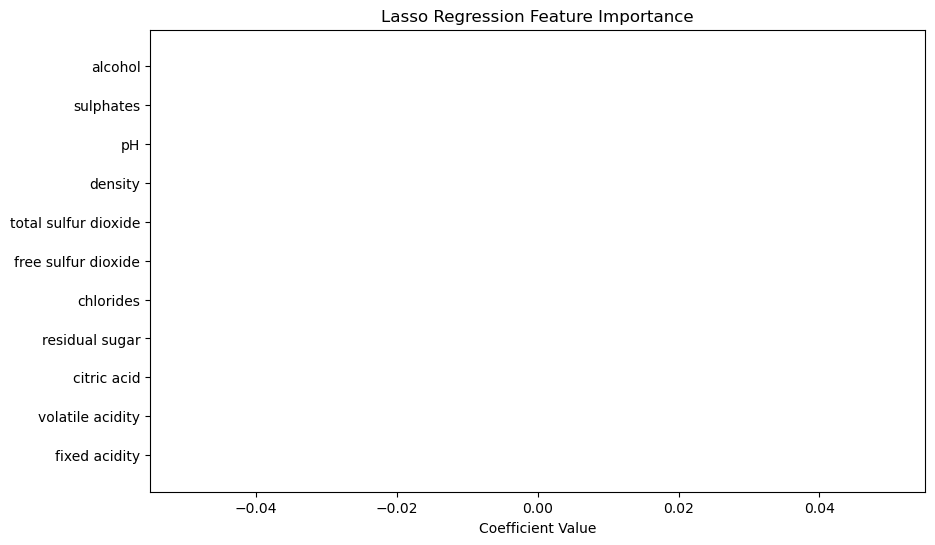

In [80]:
# Visualizing the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(coefs['feature'], coefs['coef_lasso'])
plt.title("Lasso Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.show()

In [81]:
#Caluclating R-squared, RMSE and MAE of Linear regression
r2_r3 = r2_score(y_test, y_pred_linear)
Rmse3 = np.sqrt(mean_squared_error(y_test, y_pred_linear))
Mae3 = mean_absolute_error(y_test, y_pred_linear)

In [82]:
print("Ridge Model Metrics:")
print("R-squared:", r2_r3)
print("RMSE:", Rmse3)
print("MAE:", Mae3)

Ridge Model Metrics:
R-squared: 0.3915360499058189
RMSE: 0.656512760797608
MAE: 0.5041409053480712


In [83]:
# Calculating the feature importance scores
coefs = pd.DataFrame({'feature': X.columns, 'coef_linear': regressor.coef_})

# Sorting the features by their coefficient values
coefs.sort_values('coef_linear', inplace=True, ascending=False)
print(coefs)

                 feature  coef_linear
10               alcohol     0.333970
9              sulphates     0.148499
5    free sulfur dioxide     0.048723
7                density     0.042064
3         residual sugar    -0.005231
2            citric acid    -0.019148
0          fixed acidity    -0.049675
4              chlorides    -0.115971
8                     pH    -0.121548
6   total sulfur dioxide    -0.123600
1       volatile acidity    -0.178494


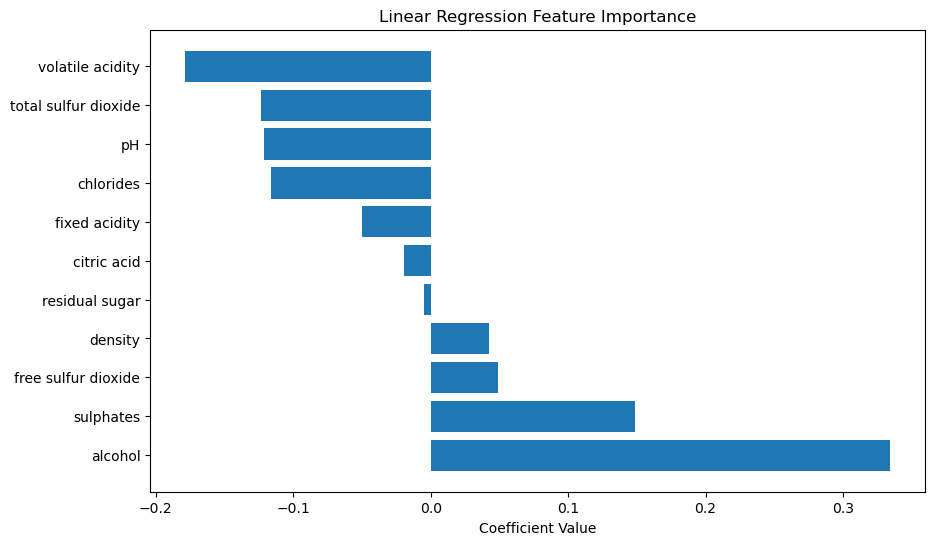

In [84]:
# Visualizing the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(coefs['feature'], coefs['coef_linear'])
plt.title("Linear Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.show()

In [85]:
#comparing R-squared (Coefficient of determination) and checking the performance of the three models

if r2_r1 > r2_r2 and r2_r1 > r2_r3:
    print("Ridge Regression performs better than Lasso Regression and Linear regression")
elif r2_r2 > r2_r1 and r2_r2 > r2_r3:
    print("Lasso Regression performs better than Ridge Regression and Linear regression")
else:
    print("Linear Regression performs better than Lasso Regression and Ridge regression")

Ridge Regression performs better than Lasso Regression and Linear regression


In [86]:
#comparing the RMSE (Root Mean Squared Error) and checking the performance of the three models

if Rmse1 < Rmse2 and Rmse1 < Rmse3:
    print("Ridge Regression performs better than Lasso Regression and Linear regression")
elif Rmse2 < Rmse1 and Rmse2 < Rmse3:
    print("Lasso Regression performs better than Ridge Regression and Linear regression")
else:
    print("Linear Regression performs better than Lasso Regression and Ridge regression")

Ridge Regression performs better than Lasso Regression and Linear regression


In [87]:
#comparing the MAE (Mean absolute error) and checking the performance of the three models

if Mae1 < Mae2 and Mae1 < Mae3:
    print("Ridge Regression performs better than Lasso Regression and Linear regression")
elif Mae2 < Mae1 and Mae2 < Mae3:
    print("Lasso Regression performs better than Ridge Regression and Linear regression")
else:
    print("Linear Regression performs better than Lasso Regression and Ridge regression")


Ridge Regression performs better than Lasso Regression and Linear regression


In [55]:
#Based on the above comparisions we can say that Linear regression model performs better with Lasso regression and Ridge regression